In [16]:
import numpy as np
import os
from tabulate import tabulate
from matplotlib import pyplot as plt
from matplotlib import cm
from termcolor import colored

In [8]:
import pandas as pd
import DMT.core


In [23]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [22]:
dut_type = 'nfet_01v8'
cells_fdir = '../sky130_fd_pr/cells'
dut_fdir = cells_fdir+'/'+dut_type

In [54]:
fsel = 0
flist0 = os.listdir(dut_fdir)
flist_mdm = []

dut_sel = {'w':'1u', 'l':'0p15u', 'm':'1'}


idx = 0
dut_groups = {}
for fn in flist0:
    if fn.endswith('.mdm'):
        flist_mdm.append(fn)
        
        fn_parts = fn[:-5].split('(')
        if fn_parts[0] not in dut_groups:
            dut_groups[fn_parts[0]] = [fn_parts[1]]
        else:
            dut_groups[fn_parts[0]].append(fn_parts[1])
        
        
        
        if idx == fsel:
            fn_sel = fn
            print('{:03d}>> '.format(idx)+fn)
        else:
            print('{:03d})  '.format(idx)+fn)
        idx += 1
            


000>> sky130_fd_pr__nfet_01v8_w7u_l0p18u_m1(8434_5_6_IDVD).mdm
001)  sky130_fd_pr__nfet_01v8_w1u_l0p15u_m1(8436_3_4_IDVD).mdm
002)  sky130_fd_pr__nfet_01v8_w0p420u_l0p150u_m1(2602_1_10_IDVG).mdm
003)  sky130_fd_pr__nfet_01v8_w0p84u_l0p15u_m1290(5290_8_IDVG_D3).mdm
004)  sky130_fd_pr__nfet_01v8_w0p42u_l0p15u_m1(8008_10_11_IDVD).mdm
005)  sky130_fd_pr__nfet_01v8_w7u_l8u_m1(8392_5_6_IDVG).mdm
006)  sky130_fd_pr__nfet_01v8_w1u_l0p15u_m1(8436_4_5_IDVD).mdm
007)  sky130_fd_pr__nfet_01v8_w7u_l8u_m1(8008_4_5_IDVG).mdm
008)  sky130_fd_pr__nfet_01v8_w0p82u_l0p18u_m1276(5290_11_IDVG_D3).mdm
009)  sky130_fd_pr__nfet_01v8_w0p42u_l0p5u_m1(8701_5_6_IDVD).mdm
010)  sky130_fd_pr__nfet_01v8_w0p65u_l0p15u_m1560(5290_5_IDVG_D3).mdm
011)  sky130_fd_pr__nfet_01v8_w7u_l0p15u_m1(8392_7_8_IDVD).mdm
012)  sky130_fd_pr__nfet_01v8_w0p42u_l0p5u_m1(8436_10_11_IDVD).mdm
013)  sky130_fd_pr__nfet_01v8_w1u_l0p15u_m1(8436_5_6_IDVD).mdm
014)  sky130_fd_pr__nfet_01v8_w0p36u_l0p15u_m1(8701_9_10_IDVD).mdm
015)  sky130_fd_pr

In [31]:
fn

'sky130_fd_pr__nfet_01v8_w0p64u_l0p15u_m1590(5290_7_IDVD_D3).mdm'

In [55]:
dut_groups

{'sky130_fd_pr__nfet_01v8_w7u_l0p18u_m1': ['8434_5_6_IDVD',
  '8434_4_5_IDVG',
  '8434_7_8_IDVG',
  '8434_3_4_IDVG',
  '8434_7_8_IDVD',
  '8434_3_4_IDVD',
  '8434_5_6_IDVG',
  '8434_6_7_IDVG',
  '8434_4_5_IDVD',
  '8434_8_9_IDVG',
  '8434_8_9_IDVD',
  '8434_6_7_IDVD'],
 'sky130_fd_pr__nfet_01v8_w1u_l0p15u_m1': ['8436_3_4_IDVD',
  '8436_4_5_IDVD',
  '8436_5_6_IDVD',
  '8436_7_8_IDVD',
  '8436_8_9_IDVG',
  '8436_4_5_IDVG',
  '8436_3_4_IDVG',
  '8436_7_8_IDVG',
  '8436_6_7_IDVG',
  '8436_6_7_IDVD',
  '8436_5_6_IDVG',
  '8436_8_9_IDVD'],
 'sky130_fd_pr__nfet_01v8_w0p420u_l0p150u_m1': ['2602_1_10_IDVG',
  '2602_1_10_IDVD',
  '2602_1_8_IDVG',
  '2602_1_7_IDVG',
  '2602_1_8_IDVD',
  '2602_1_9_IDVG',
  '2602_1_7_IDVD',
  '2602_1_9_IDVD'],
 'sky130_fd_pr__nfet_01v8_w0p84u_l0p15u_m1290': ['5290_8_IDVG_D3',
  '5290_8_IDVD_D3'],
 'sky130_fd_pr__nfet_01v8_w0p42u_l0p15u_m1': ['8008_10_11_IDVD',
  '8008_11_12_IDVG',
  '8008_11_12_IDVD',
  '8008_10_11_IDVG',
  '8392_11_12_IDVG',
  '8008_9_10_IDVG',
  

In [57]:
fn = 'sky130_fd_pr__nfet_01v8_w1u_l0p15u_m1(8436_8_9_IDVD).mdm'
meas = DMT.core.DutMeas(
    database_dir = None,
    dut_type = DMT.core.DutType.device,
    name = fn[:-4],
    reference_node = 'E')

meas.add_data(dut_fdir+'/'+fn, key=fn[:-4])

In [58]:
df = meas.data[fn[:-4]]
df

,VD,ID,IB,IG,VG,VS,VB
0,0.00,-8.470000e-10,-2.651300e-08,-7.954000e-10,0.0,0.0,0.0
1,0.05,1.519600e-09,1.928900e-08,-1.317200e-09,0.0,0.0,0.0
2,0.10,1.846000e-10,1.191800e-08,-2.658800e-09,0.0,0.0,0.0
3,0.15,-2.260200e-09,5.270000e-10,-9.878000e-10,0.0,0.0,0.0
4,0.20,-2.171000e-09,-9.593000e-09,-1.150300e-09,0.0,0.0,0.0
...,...,...,...,...,...,...,...
439,1.60,3.461600e-04,2.537000e-09,-1.388300e-09,1.8,0.0,-0.9
440,1.65,3.479000e-04,8.033000e-09,-1.958300e-09,1.8,0.0,-0.9
441,1.70,3.497000e-04,1.112000e-09,-1.304300e-09,1.8,0.0,-0.9
442,1.75,3.509700e-04,-7.783000e-09,2.796900e-09,1.8,0.0,-0.9


In [68]:
df.groupby(['VG', 'VS', 'VB'])
gb.get_group((0.0, 0.0, -0.9))

,VD,ID,IB,IG,VG,VS,VB
222,0.00,4.177000e-10,1.050300e-08,9.250000e-11,0.0,0.0,-0.9
223,0.05,2.185600e-09,1.123800e-08,2.994000e-10,0.0,0.0,-0.9
224,0.10,2.284300e-09,1.073300e-08,5.004000e-10,0.0,0.0,-0.9
225,0.15,1.397700e-09,2.336500e-08,-1.335000e-09,0.0,0.0,-0.9
226,0.20,7.150000e-11,1.137200e-08,-2.715700e-09,0.0,0.0,-0.9
227,0.25,-2.039200e-09,-1.166500e-08,-1.190000e-11,0.0,0.0,-0.9
228,0.30,-2.133100e-09,-1.181400e-08,-2.393000e-10,0.0,0.0,-0.9
229,0.35,-2.201800e-09,-1.152900e-08,-4.759000e-10,0.0,0.0,-0.9
230,0.40,-2.248800e-09,-1.058400e-08,-7.076000e-10,0.0,0.0,-0.9
231,0.45,-1.561700e-09,-1.683600e-08,1.256800e-09,0.0,0.0,-0.9


Text(0.5, 0.98, 'sky130_fd_pr__nfet_01v8_w1u_l0p15u_m1(8436_8_9_IDVD)')

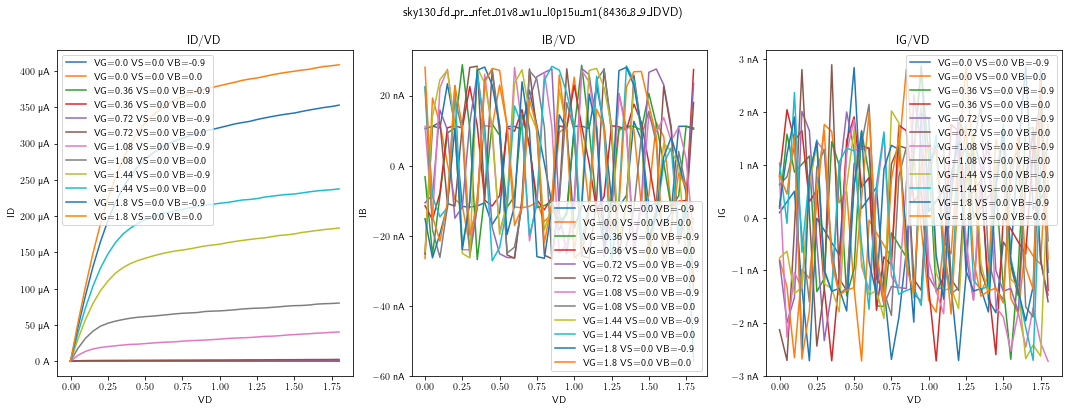

In [63]:

from matplotlib.ticker import EngFormatter

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

plots = dict(zip(['ID', 'IB', 'IG'], axs))

gb = df.groupby(['VG', 'VS', 'VB'])
for g in gb.groups:
    label = f'VG={g[0]} VS={g[1]} VB={g[2]}'
    for c, ax in plots.items():
        gdf = gb.get_group(g)[['VD', c]].rename(columns={c: label})
        gplt = gdf.plot(ax=ax, x='VD')
        gplt.set_title(f'{c}/VD')
        gplt.set_ylabel(c)
        formatter0 = EngFormatter(unit='A')
        ax.yaxis.set_major_formatter(formatter0)
fig.suptitle(fn[:-4])

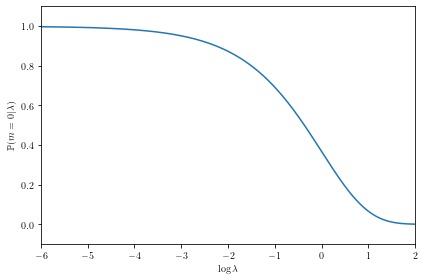

In [51]:
import numpy as np
import matplotlib.pyplot as plt
preamble='\\usepackage{amsmath}\n\\usepackage{amsfonts}'

plt.rc('text',usetex=True)
plt.rc('text.latex',preamble=preamble)

fig,ax=plt.subplots()

all_lambda = np.linspace(-6,2,1000)
ax.plot(all_lambda,np.exp(-np.exp(all_lambda)))
ax.set_xlim([-6,2])
ax.set_ylim([-0.1,1.1])
ax.set_xlabel(r'$\log\lambda$')
ax.set_ylabel(r'$\mathbb{P}(m=0\lvert \lambda)$')
fig.tight_layout()
plt.show()